In [86]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Generating the data

In [87]:
df = pd.DataFrame({"Age":[36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45]
,"Experience":[10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9]
,"Health Condition":[9,4,6,4,8,5,7,9,7,9,5,7,9]
,"Selected":['NO','NO', 'NO', 'NO', 'YES','NO', 'YES', 'YES', 'YES', 'YES','NO', 'YES', 'YES']})

df

,Age,Experience,Health Condition,Selected
0,36,10,9,NO
1,42,12,4,NO
2,23,4,6,NO
3,52,4,4,NO
4,43,21,8,YES
5,44,14,5,NO
6,66,3,7,YES
7,35,14,9,YES
8,52,13,7,YES
9,35,5,9,YES


# Transforming Labels of the dataset into Integers

In [88]:
d = {'YES': 1, 'NO': 0}
df['Selected'] = df['Selected'].map(d)

print(df)

    Age  Experience  Health Condition  Selected
0    36          10                 9         0
1    42          12                 4         0
2    23           4                 6         0
3    52           4                 4         0
4    43          21                 8         1
5    44          14                 5         0
6    66           3                 7         1
7    35          14                 9         1
8    52          13                 7         1
9    35           5                 9         1
10   24           3                 5         0
11   18           3                 7         1
12   45           9                 9         1


# Extracting Features and Labels

In [89]:
features = ['Age', 'Experience', 'Health Condition']

X = df[features]
y = df['Selected']

In [90]:
X

,Age,Experience,Health Condition
0,36,10,9
1,42,12,4
2,23,4,6
3,52,4,4
4,43,21,8
5,44,14,5
6,66,3,7
7,35,14,9
8,52,13,7
9,35,5,9


In [91]:
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Selected, dtype: int64

# Instantiating Decision Tree Classifier and fitting to the data

In [92]:
dtree = DecisionTreeClassifier()

In [93]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [94]:
dtree = dtree.fit(X, y)

# Visualizing Decision Tree

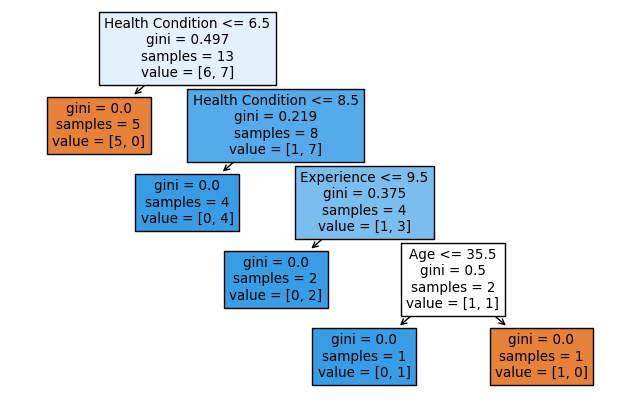

In [95]:
plt.figure(figsize=(8,5))
plot_tree(dtree, filled = True, feature_names = X.columns);

# Getting important features

In [96]:
pd.DataFrame(index = X.columns, data=dtree.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Age,0.154762
Experience,0.077381
Health Condition,0.767857


# Generating Test data and getting predictions from tree classifier

In [97]:
X_test = pd.DataFrame({"Age":[40],"Experience":[11], "Health Condition":[6]})
X_test

,Age,Experience,Health Condition
0,40,11,6


In [98]:
print(dtree.predict(X_test))

[0]


In [99]:
X_test_02 = pd.DataFrame({"Age":[70],"Experience":[21], "Health Condition":[9]})
X_test_02

,Age,Experience,Health Condition
0,70,21,9


In [100]:
print(dtree.predict(X_test_02))

[0]


# Creating tree model using criterion ='entropy'

In [101]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

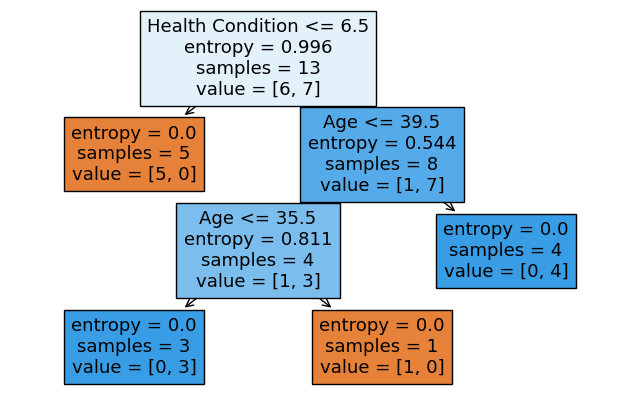

In [102]:
plt.figure(figsize=(8,5))
plot_tree(entropy_tree,filled=True,feature_names=X.columns);

In [103]:
pd.DataFrame(index=X.columns,data=entropy_tree.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.335937
Experience,0.000000
Health Condition,0.664063


In [104]:
print(entropy_tree.predict(X_test))

[0]


In [105]:
print(entropy_tree.predict(X_test_02))

[1]
